In [17]:
from os import listdir
from matplotlib import image
import random
import numpy as np 
from dataclasses import dataclass

# load all images in a directory
random.seed(5)
random_indexes = random.sample(range(25000), 250)
loaded_images = list()
for i in range(250):
	# load image
	filename = 'im' + str(random_indexes[i]) + '.jpg'
	img_data = image.imread('../mirflickr25k/mirflickr/' + filename)
	# store loaded image
	loaded_images.append(img_data)
	print('> loaded %s %s' % (filename, img_data.shape))

> loaded im20411.jpg (500, 375, 3)
> loaded im8370.jpg (500, 375, 3)
> loaded im24306.jpg (500, 375, 3)
> loaded im11748.jpg (500, 333, 3)
> loaded im22624.jpg (333, 500, 3)
> loaded im24244.jpg (500, 333, 3)
> loaded im21365.jpg (375, 500, 3)
> loaded im17368.jpg (500, 334, 3)
> loaded im950.jpg (500, 375, 3)
> loaded im15257.jpg (500, 379, 3)
> loaded im8160.jpg (333, 500, 3)
> loaded im21265.jpg (369, 500, 3)
> loaded im1699.jpg (334, 500, 3)
> loaded im5139.jpg (500, 389, 3)
> loaded im3709.jpg (333, 500, 3)
> loaded im12182.jpg (333, 500, 3)
> loaded im15370.jpg (375, 500, 3)
> loaded im8079.jpg (333, 500, 3)
> loaded im12476.jpg (500, 347, 3)
> loaded im17817.jpg (333, 500, 3)
> loaded im3341.jpg (315, 500, 3)
> loaded im18806.jpg (500, 357, 3)
> loaded im8170.jpg (346, 500, 3)
> loaded im429.jpg (370, 500, 3)
> loaded im23959.jpg (166, 500, 3)
> loaded im7101.jpg (500, 333, 3)
> loaded im13374.jpg (500, 335, 3)
> loaded im9158.jpg (375, 500, 3)
> loaded im5966.jpg (333, 500, 3)


> loaded im15169.jpg (500, 375, 3)
> loaded im9464.jpg (500, 350, 3)
> loaded im16395.jpg (340, 500, 3)
> loaded im21215.jpg (405, 500, 3)
> loaded im22073.jpg (422, 500, 3)
> loaded im11684.jpg (274, 500, 3)
> loaded im11399.jpg (390, 500, 3)
> loaded im8974.jpg (328, 500, 3)


In [67]:
#1.
values = np.zeros((3, 256))
index = 0
for image in loaded_images:
	for i in range(image.shape[0]):
		for j in range(image.shape[1]):
			values[0][image[i][j][0]] += 1
			values[1][image[i][j][1]] += 1
			values[2][image[i][j][2]] += 1
	index += 1
	if (index % 10) == 0:
		print('> processed %i images' % (index))

> processed 10 images
> processed 20 images
> processed 30 images
> processed 40 images
> processed 50 images
> processed 60 images
> processed 70 images
> processed 80 images
> processed 90 images
> processed 100 images
> processed 110 images
> processed 120 images
> processed 130 images
> processed 140 images
> processed 150 images
> processed 160 images
> processed 170 images
> processed 180 images
> processed 190 images
> processed 200 images
> processed 210 images
> processed 220 images
> processed 230 images
> processed 240 images
> processed 250 images


In [68]:
RED = 0
GREEN = 1
BLUE = 2
#2.a. max and min finding
print('Red:\t', end='')
for i in range(255, 0, -1):
    if (values[RED][i] != 0):
        print('Max - {}, '.format(i), end='')
        break
for i in range(0, 255):
    if (values[RED][i] != 0):
        print('Min - {}'.format(i))
        break

print('Green:\t', end='')
for i in range(255, 0, -1):
    if (values[GREEN][i] != 0):
        print('Max - {}, '.format(i), end='')
        break
for i in range(0, 255):
    if (values[GREEN][i] != 0):
        print('Min - {}'.format(i))
        break

print('Blue:\t', end='')
for i in range(255, 0, -1):
    if (values[BLUE][i] != 0):
        print('Max - {}, '.format(i), end='')
        break
for i in range(0, 255):
    if (values[BLUE][i] != 0):
        print('Min - {}'.format(i))
        break

Red:	Max - 255, Min - 0
Green:	Max - 255, Min - 0
Blue:	Max - 255, Min - 0


In [69]:
#2.b Mat ochikuvannya i dispersiya 
#RED
sum_val = sum(values[RED])
M_red = 0
for index in range(len(values[RED])):
    p = (values[RED][index] / sum_val)
    M_red += p * index
D_red = 0
for index in range(len(values[RED])):
    p = (values[RED][index] / sum_val)
    D_red += p * ((index - M_red) ** 2)
print("Red:\tmat ochikuvannya - {0:.2f},\tdispersiya - {1:.2f}"\
.format(M_red, D_red))

#GREEN
sum_val = sum(values[GREEN])
M_green = 0
for index in range(len(values[GREEN])):
    p = (values[GREEN][index] / sum_val)
    M_green += p * index
D_green = 0
for index in range(len(values[GREEN])):
    p = (values[GREEN][index] / sum_val)
    D_green += p * ((index - M_green) ** 2)
print("Green:\tmat ochikuvannya - {0:.2f},\tdispersiya - {1:.2f}"\
.format(M_green, D_green))
    
#BLUE
sum_val = sum(values[BLUE])
M_blue = 0
for index in range(len(values[BLUE])):
    p = (values[BLUE][index] / sum_val)
    M_blue += p * index
D_blue = 0
for index in range(len(values[BLUE])):
    p = (values[BLUE][index] / sum_val)
    D_blue += p * ((index - M_blue) ** 2)
print("Blue:\tmat ochikuvannya - {0:.2f},\tdispersiya - {1:.2f}"\
.format(M_blue, D_blue))

Red:	mat ochikuvannya - 113.03,	dispersiya - 6187.30
Green:	mat ochikuvannya - 104.76,	dispersiya - 5666.94
Blue:	mat ochikuvannya - 93.65,	dispersiya - 5979.26


In [70]:
#2.c Median and interquartal rozmah

def medianFinder(array_values):
    sum_val = sum(array_values)
    summa = 0
    for index in range(len(array_values)):
        summa += array_values[index]
        if (summa > (sum_val / 2)):
            return index - 1
        if (summa == (sum_val / 2)):
            return (2 * index + 1) / 2

def quartFinder(array_values, quart):
    sum_val = sum(array_values)
    summa = 0
    for index in range(len(array_values)):
        prev_sum = summa
        p = array_values[index] /  sum_val
        summa += p
        if (summa > quart):
            if (quart - prev_sum < summa - quart):
                return index - 1
            elif (quart - prev_sum > summa - quart):
                return index
            else:
                return (2 * index - 1) / 2

#RED
print('Red:\tmedian - {0},\tIQR - {1}'.format(medianFinder(values[RED]),\
quartFinder(values[RED], 0.75) - quartFinder(values[RED], 0.25)))
print('Green:\tmedian - {0},\tIQR - {1}'.format(medianFinder(values[GREEN]),\
quartFinder(values[GREEN], 0.75) - quartFinder(values[GREEN], 0.25)))
print('Blue:\tmedian - {0},\tIQR - {1}'.format(medianFinder(values[BLUE]),\
quartFinder(values[BLUE], 0.75) - quartFinder(values[BLUE], 0.25)))

Red:	median - 110,	IQR - 138
Green:	median - 98,	IQR - 128
Blue:	median - 76,	IQR - 130


In [71]:
def E_operator(arr_values, M, power):
    sum_val = sum(arr_values)
    ans = 0
    for index in range(len(arr_values)):
        p = (arr_values[index] / sum_val)
        ans += p * ((index - M) ** power)
    return ans
        
#2.d Asimmetriya, ekscess
Asym_red = E_operator(values[RED], M_red, 3) / (D_red ** (3 / 2))
Asym_green = E_operator(values[GREEN], M_green, 3) / (D_green ** (3 / 2))
Asym_blue = E_operator(values[BLUE], M_blue, 3) / (D_blue ** (3 / 2))

Ekscess_red = E_operator(values[RED], M_red, 4) / (D_red ** 2)
Ekscess_green = E_operator(values[GREEN], M_green, 4) / (D_green ** 2)
Ekscess_blue = E_operator(values[BLUE], M_blue, 4) / (D_blue ** 2)
print('Red:\tAsimmetriya - {0:.3f},\tEkscess - {1:.3f}'\
.format(Asym_red, Ekscess_red))
print('Green:\tAsimmetriya - {0:.3f},\tEkscess - {1:.3f}'\
.format(Asym_green, Ekscess_green))
print('Blue:\tAsimmetriya - {0:.3f},\tEkscess - {1:.3f}'\
.format(Asym_blue, Ekscess_blue))

Red:	Asimmetriya - 0.156,	Ekscess - 1.787
Green:	Asimmetriya - 0.292,	Ekscess - 1.937
Blue:	Asimmetriya - 0.519,	Ekscess - 2.058


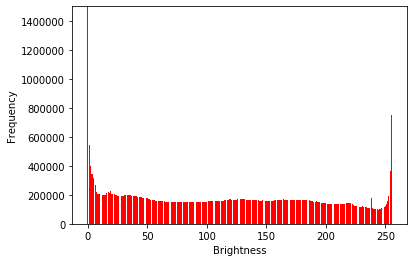

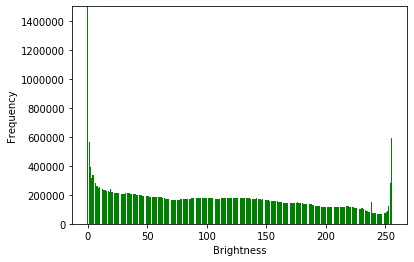

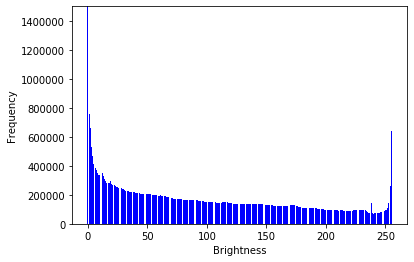

In [72]:
import matplotlib.pyplot as plt
#3. Histograms
x = range(256)

#RED
plt.bar(x,values[RED],color='red')
plt.xlabel('Brightness')
plt.ylabel('Frequency')
plt.ylim(top=1500000)
plt.show()
#GREEN
plt.bar(x,values[GREEN],color='green')
plt.xlabel('Brightness')
plt.ylabel('Frequency')
plt.ylim(top=1500000)
plt.show()
#BLUE
plt.bar(x,values[BLUE],color='blue')
plt.xlabel('Brightness')
plt.ylabel('Frequency')
plt.ylim(top=1500000)
plt.show()

In [105]:
from sklearn.preprocessing import StandardScaler
import scipy
import pandas as pd
import warnings
warnings.filterwarnings('ignore')

#4. 5. Approximation and Rozpodil
sc=StandardScaler() 
y = values[RED]

size = len(y)
yy = y.reshape (-1, 1)
sc.fit(yy)
y_std =sc.transform(yy)
y_std = y_std.flatten()

dist_names = ['beta',
              'expon',
              'gamma',
              'lognorm',
              'norm',
              'pearson3',
              'triang',
              'uniform',
              'weibull_min', 
              'weibull_max']

# Set up empty lists to stroe results
chi_square = []
p_values = []

# Set up 50 bins for chi-square test
# Observed data will be approximately evenly distrubuted aross all bins
percentile_bins = np.linspace(0,100,51)
percentile_cutoffs = np.percentile(y_std, percentile_bins)
observed_frequency, bins = (np.histogram(y_std, bins=percentile_cutoffs))
cum_observed_frequency = np.cumsum(observed_frequency)

# Loop through candidate distributions

for distribution in dist_names:
    # Set up distribution and get fitted distribution parameters
    dist = getattr(scipy.stats, distribution)
    param = dist.fit(y_std)
    
    # Obtain the KS test P statistic, round it to 5 decimal places
    p = scipy.stats.kstest(y_std, distribution, args=param)[1]
    p = np.around(p, 5)
    p_values.append(p)    
    
    # Get expected counts in percentile bins
    # This is based on a 'cumulative distrubution function' (cdf)
    cdf_fitted = dist.cdf(percentile_cutoffs, *param[:-2], loc=param[-2], 
                          scale=param[-1])
    expected_frequency = []
    for bin in range(len(percentile_bins)-1):
        expected_cdf_area = cdf_fitted[bin+1] - cdf_fitted[bin]
        expected_frequency.append(expected_cdf_area)
    
    # calculate chi-squared
    expected_frequency = np.array(expected_frequency) * size
    cum_expected_frequency = np.cumsum(expected_frequency)
    ss = sum (((cum_expected_frequency - cum_observed_frequency) ** 2) / cum_observed_frequency)
    chi_square.append(ss)
        
# Collate results and sort by goodness of fit (best at top)

results = pd.DataFrame()
results['Distribution'] = dist_names
results['chi_square'] = chi_square
results['p_value'] = p_values
results.sort_values(['chi_square'], inplace=True)
    
# Report results

print ('\nDistributions sorted by goodness of fit:')
print ('----------------------------------------')
print (results)


Distributions sorted by goodness of fit:
----------------------------------------
  Distribution    chi_square  p_value
9  weibull_max    251.305185      0.0
0         beta    320.749959      0.0
3      lognorm    355.267569      0.0
5     pearson3    507.178766      0.0
8  weibull_min   1028.723132      0.0
1        expon   1378.397636      0.0
4         norm   2722.282670      0.0
6       triang   4840.349587      0.0
7      uniform   5511.382561      0.0
2        gamma  13606.539386      0.0
